In [19]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
data_csv = pd.read_csv("/kaggle/input/5x7-dcg/test_cases.csv")
print(data_csv)
# binary , outlet_1, outlet_2, outlet_3, outlet_4, outlet_5, outlet_6

                                                  binary  Outlet_1  Outlet_2  \
0      1011111111011111111111111101110111100111101101...         1         2   
1      1011111111011111111111111110101011111100111111...         1         2   
2      1011111111011111111111111111011011101001011101...         1         2   
3      1011111111011111111111111111101011111111011111...         1         2   
4      1011111111011111111111111111111110111111101111...         1         2   
...                                                  ...       ...       ...   
14994  1011111111011111111111110111111111111111111101...         1         2   
14995  1011111111011111111111111010111111111111111111...         1         2   
14996  1011111111011111111111111011101101111111111111...         1         2   
14997  1011111111011111111111111011111010111111111110...         1         2   
14998  1011111111011111111111111011111011101111111011...         1         2   

       Outlet_3  Outlet_4  Outlet_5  Ou

In [21]:
# 4 outlets, 2 inlets

#compute the length values of channels for each of the chip design

L_values = []
for x in data_csv['binary'] : 
    chip_length = 0
    for i in range(0,58) : 
        if x[i] == '1' :
            chip_length += 1.0 #non-diagonal
    for i in range(58, 106):
        if x[i] == '1' :
            chip_length += 2**0.5 #non-diagonal
    L_values.append(chip_length)


# print(L_values)
data_csv['L'] = L_values

In [22]:
output_columns = ['Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6' ]
print(data_csv[output_columns].max())
print(data_csv[output_columns].min())

print(data_csv)

Outlet_3    1.690141
Outlet_4    1.695451
Outlet_5    1.721999
Outlet_6    1.729429
dtype: float64
Outlet_3    0.0
Outlet_4    0.0
Outlet_5    1.0
Outlet_6    0.0
dtype: float64
                                                  binary  Outlet_1  Outlet_2  \
0      1011111111011111111111111101110111100111101101...         1         2   
1      1011111111011111111111111110101011111100111111...         1         2   
2      1011111111011111111111111111011011101001011101...         1         2   
3      1011111111011111111111111111101011111111011111...         1         2   
4      1011111111011111111111111111111110111111101111...         1         2   
...                                                  ...       ...       ...   
14994  1011111111011111111111110111111111111111111101...         1         2   
14995  1011111111011111111111111010111111111111111111...         1         2   
14996  1011111111011111111111111011101101111111111111...         1         2   
14997  101111111101111

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

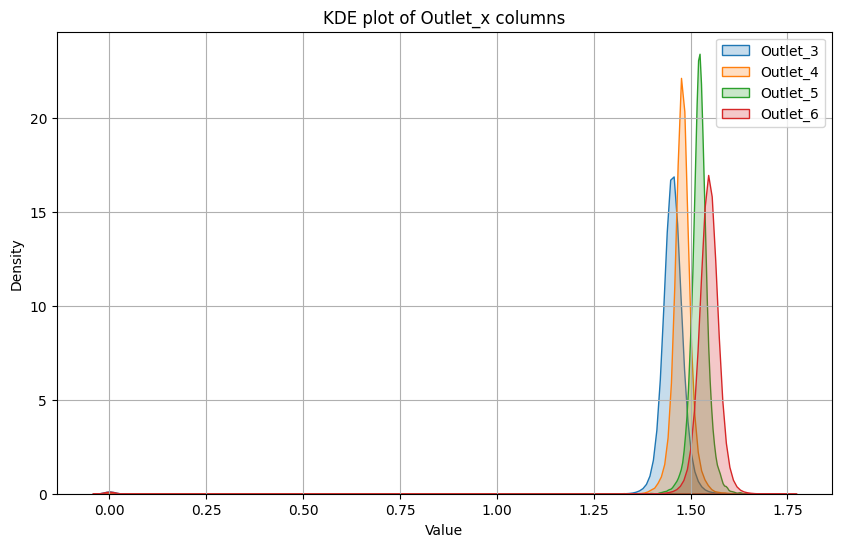

In [23]:

plt.figure(figsize=(10, 6))

for col in output_columns:
    sns.kdeplot(data_csv[col], label=col, fill=True, common_norm=False)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('KDE plot of Outlet_x columns')
plt.legend()
plt.grid(True)
plt.show()

In [24]:

import random
num_test_cases = 100
num_data_points = 5000
test_cases = []
while len(test_cases) < num_test_cases : 
    a = random.uniform(1.25, 1.65)
    b = random.uniform(a, 1.75)
    d = (b - a) / 3
    test_cases.append([a, a + d, a + 2*d, b])

In [25]:
X = np.empty((num_data_points,4))
for i in range(0,num_data_points) :
    X[i] = [data_csv['Outlet_3'][i], data_csv['Outlet_4'][i], data_csv['Outlet_5'][i], data_csv['Outlet_6'][i]]
    X[i].sort()
    # print(X[i])
print(X)

[[1.45828859 1.49051991 1.53170818 1.54957625]
 [1.4392661  1.48004332 1.52005623 1.54961785]
 [1.4143865  1.43474967 1.46939977 1.50760679]
 ...
 [1.47542292 1.49707145 1.5334231  1.55921797]
 [1.45865138 1.47268071 1.50601293 1.53079066]
 [1.45733725 1.47771668 1.51106563 1.53841973]]


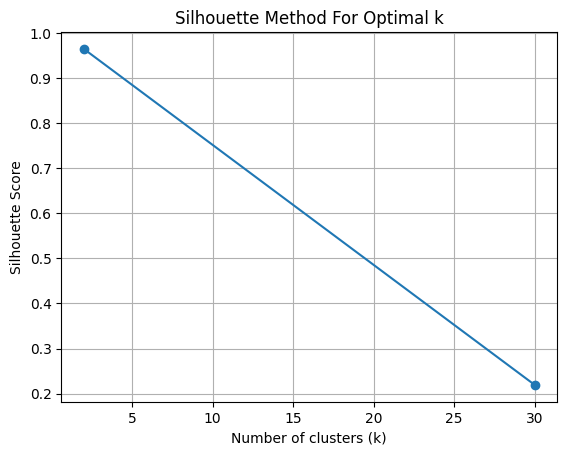

In [26]:
from sklearn.metrics import silhouette_score
k_range = (2,30)
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')  # use 'n_init="auto"' if using scikit-learn >= 1.2
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.grid(True)
plt.show()


In [27]:
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Best number of clusters by silhouette method: {best_k}")

Best number of clusters by silhouette method: 2


In [28]:
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init='auto')

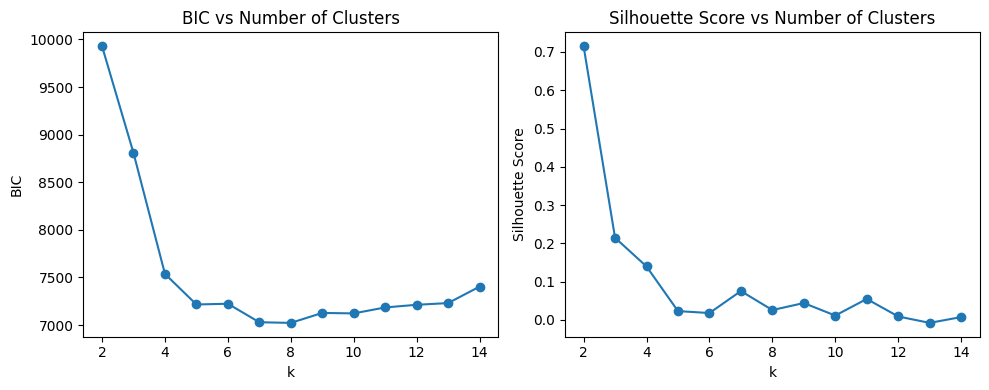

In [29]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np
bic_scores = []
sil_scores = []
k_range = range(2, 15)

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_scaled)
    labels = gmm.predict(X_scaled)
    
    bic_scores.append(gmm.bic(X_scaled))
    
    if len(set(labels)) > 1:
        sil_scores.append(silhouette_score(X_scaled, labels))
    else:
        sil_scores.append(-1)

# Plot BIC and silhouette
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(k_range, bic_scores, marker='o')
plt.title("BIC vs Number of Clusters")
plt.xlabel("k")
plt.ylabel("BIC")

plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("k")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

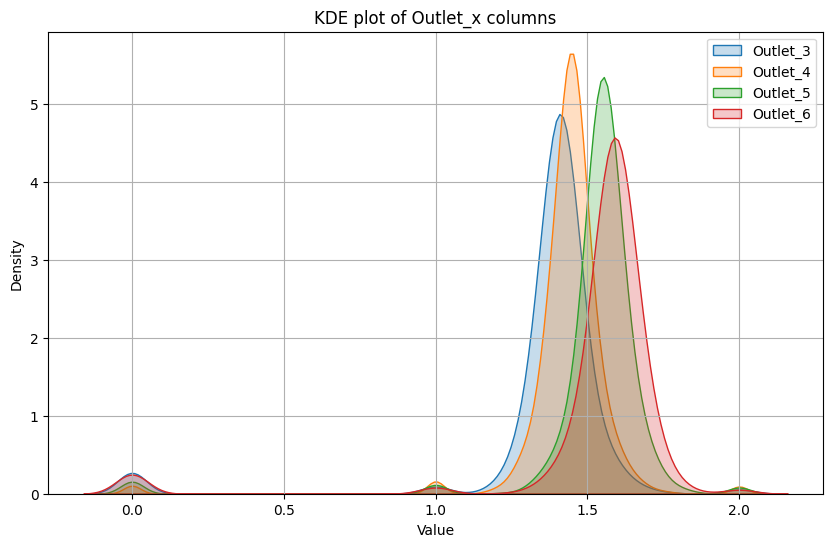

In [30]:
data_csv1 = pd.read_csv('/kaggle/input/5x7-ndc/outlet_concentration_non_diagonal_chip_second.csv')
plt.figure(figsize=(10, 6))

for col in output_columns:
    sns.kdeplot(data_csv1[col], label=col, fill=True, common_norm=False)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('KDE plot of Outlet_x columns')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
L_values = []
for x in data_csv1['binary'] : 
    chip_length = 0
    for i in range(0,58) : 
        if x[i] == '1' :
            chip_length += 1.0 #non-diagonal
    for i in range(58, 106):
        if x[i] == '1' :
            chip_length += 2**0.5 #non-diagonal
    L_values.append(chip_length)


# print(L_values)
data_csv1['L'] = L_values

In [32]:
print(data_csv1)

                                                 binary  Outlet_1  Outlet_2  \
0     1011111111011111111111111101110111100111101101...         1         2   
1     1011111111011111111111111110101011111100111111...         1         2   
2     1011111111011111111111111111011011101001011101...         1         2   
3     1011111111011111111111111111101011111111011111...         1         2   
4     1011111111011111111111111111111110111111101111...         1         2   
...                                                 ...       ...       ...   
5588  0101111111001111011010111111111110111111101111...         1         2   
5589  0101111111010111111011111011111111000111111101...         1         2   
5590  0101111111011011001111000111111111111111111111...         1         2   
5591  0101111111011011111111111110110111111111111111...         1         2   
5592  0101111111011101111111111101111111111111111111...         1         2   

      Outlet_3  Outlet_4  Outlet_5  Outlet_6     L 

In [33]:

X1 = np.empty((num_data_points,4))
for i in range(0,num_data_points) :
    X1[i] = [data_csv1['Outlet_3'][i], data_csv1['Outlet_4'][i], data_csv1['Outlet_5'][i], data_csv1['Outlet_6'][i]]
    X1[i].sort()
print(X1)

[[1.49034463 1.54152256 1.5830866  1.60740626]
 [1.4033603  1.49999731 1.52108307 1.56230838]
 [1.50296012 1.54338101 1.55967482 1.59970278]
 ...
 [1.58461516 1.58823838 1.59071979 1.59371165]
 [0.         1.47961131 1.51431617 1.59624345]
 [1.44485241 1.51231804 1.54210361 1.60021483]]


In [34]:
X_scaled1 = StandardScaler().fit_transform(X1)

# Set number of components (clusters) — try a few and compare
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X_scaled1)

# Predict cluster labels
labels1 = gmm.predict(X_scaled1)

# Optional: Silhouette score
if len(set(labels1)) > 1:
    score = silhouette_score(X_scaled1, labels1)
    print(f"Silhouette Score: {score:.4f}")
else:
    print("Silhouette score not defined for 1 cluster.")

# Optional: probabilities of each point belonging to each cluster
probs1 = gmm.predict_proba(X_scaled1)

# Print basic info
n_clusters1 = len(np.unique(labels1))
print(f"Number of clusters found: {n_clusters1}")
# print(np.unique(labels))

Silhouette Score: 0.6199
Number of clusters found: 2


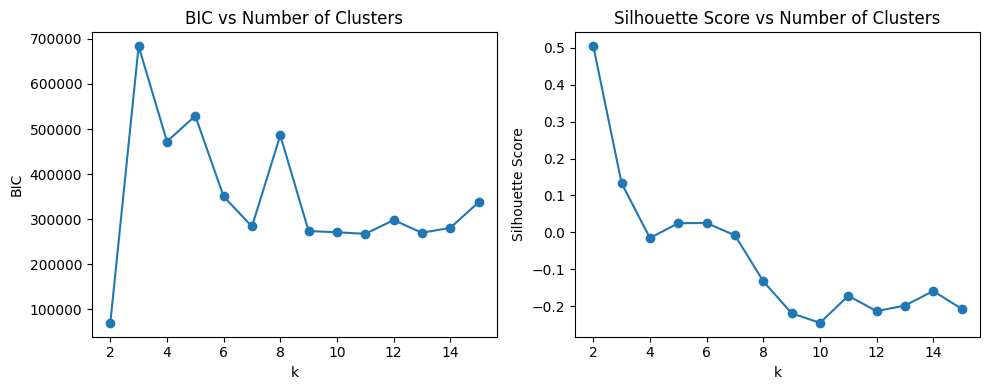

In [35]:
bic_scores = []
sil_scores = []
k_range = range(2, 16)

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_scaled)
    labels1 = gmm.predict(X_scaled1)
    
    bic_scores.append(gmm.bic(X_scaled1))
    
    if len(set(labels)) > 1:
        sil_scores.append(silhouette_score(X_scaled1, labels1))
    else:
        sil_scores.append(-1)

# Plot BIC and silhouette
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(k_range, bic_scores, marker='o')
plt.title("BIC vs Number of Clusters")
plt.xlabel("k")
plt.ylabel("BIC")

plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("k")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

In [39]:
def find_best_gmm(X):
    K_range = range(2,16)
    bic_score = []
    sil_score = []
    for k in K_range : 
        gmm = GaussianMixture(n_components = k, random_state = 42)
        gmm.fit(X)
        bic_score.append(gmm.bic(X))


    plt.figure(figsize=(8, 5))
    plt.plot(K_range, bic_score, marker='o', linestyle='-', color='blue')
    plt.title("BIC vs Number of Clusters")
    plt.xlabel("Number of Clusters")
    plt.ylabel("BIC Score")
    plt.grid(True)
    plt.show()
    
    min_index = 2 + bic_score.index(min(bic_score))
    gmm = GaussianMixture(min_index, random_state = 42)
    return gmm

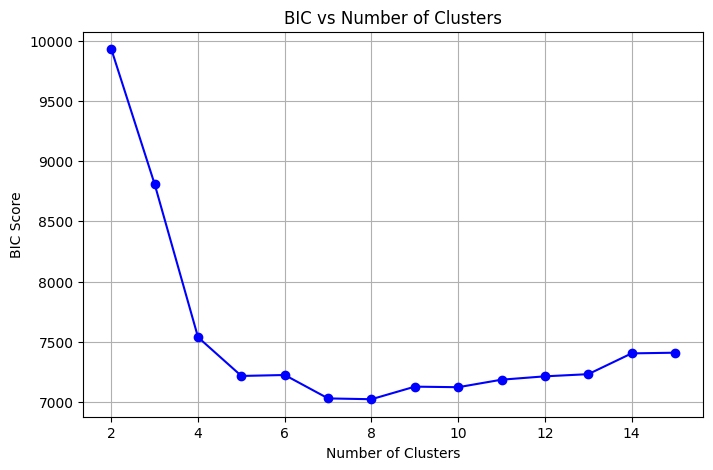

In [40]:
# We got the best models for both non-diagonal and diagonal chip cases
gmm_dc = find_best_gmm(X_scaled)

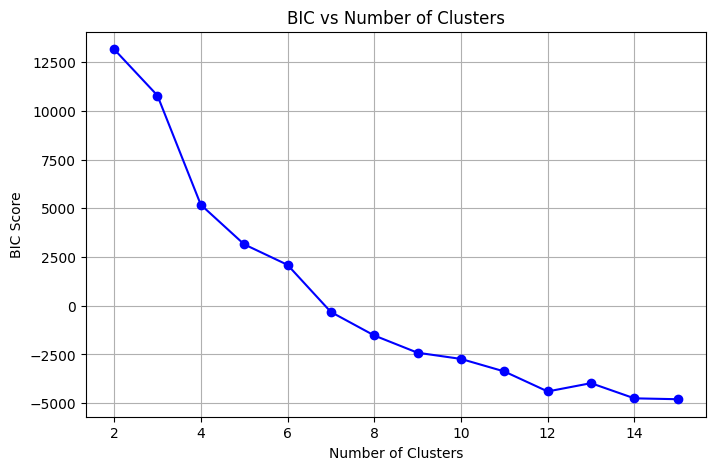

In [41]:
gmm_ndc = find_best_gmm(X_scaled1)

In [ ]:
def get_error(X, Y):
    ans = 0
    for i in range(0,4):
        ans += (X[i] - Y[i]) ** 2
    ans = ans ** 0.5
    return ans

def find_best_design(reqd, X, data) : 
    err = 10000000
    ind = 0
    ans = 0
    for z in X:
        curr_err = get_error(reqd, z)
        if curr_err < err :
            err = curr_err
            ans = ind
        ind = ind + 1
    L = data['L'][ind]
    return [err, L]

In [ ]:
ndc_err = []
dc_err = []
ndc_L = []
dc_L = []

for x in test_cases : 
    ndc = find_best_design(x, X_scaled, data_csv)
    dc = find_best_design(x, X_scaled1, data_csv1)
    dc[1] = dc[1]*2.1
    ndc[1] = ndc[1]
    dc[0] = dc[0]*1.5
    ndc_err.append(ndc[0])
    dc_err.append(dc[0])
    ndc_L.append(ndc[1])
    dc_L.append(dc[1])

[0.8048703725035209, 116.99873558030744] [0.5372417460298518, 93.39882381000533]
[0.7288948078460746, 117.94198527780274] [0.5596850651413308, 98.38563005895867]
[0.8897452252034596, 121.09540354810662] [0.7072509218316211, 101.96914888048308]
[0.8190751487206456, 114.3138188528606] [0.5847204537936632, 89.62671104226166]
[0.9558815890927904, 112.12741813448918] [0.8088672997150339, 94.21516617085139]
[0.7175356113522757, 105.22181458431005] [0.5305066250416294, 90.86142083529205]
[0.8206720897923591, 115.43412974473777] [0.6729770122401065, 106.30230993520425]
[0.9901609539383704, 104.27268426450478] [0.8411329616154324, 107.50993552191365]
[0.8687449915876375, 104.0960466219661] [0.7450951423070326, 95.15929001978392]
[0.9657959224674804, 109.5145471280891] [0.831271023680652, 93.79592087751486]
[0.8958401998260312, 102.10235639609606] [0.7370995036388963, 104.43148846329179]
[0.7396449785324762, 108.33965370086857] [0.6068954533263917, 105.34100236445018]
[0.8150958981278292, 108.45

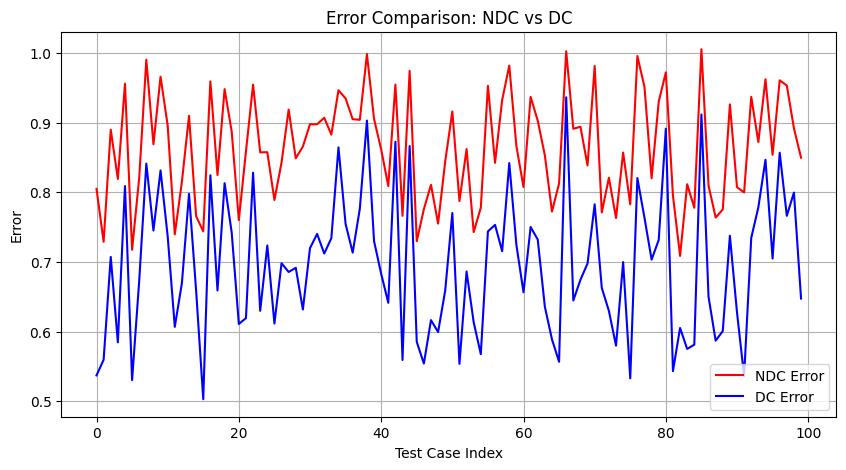

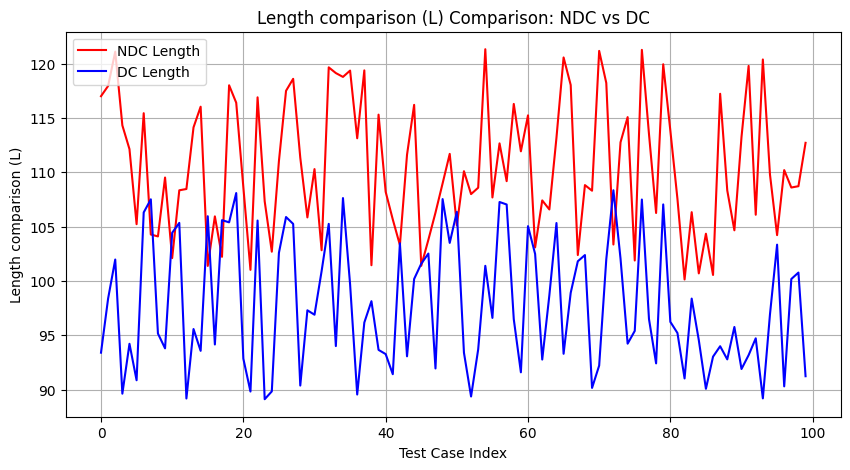

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(ndc_err, 'r-', label='NDC Error')   # red line
plt.plot(dc_err, 'b-', label='DC Error')     # blue line
plt.xlabel('Test Case Index')
plt.ylabel('Error')
plt.title('Error Comparison: NDC vs DC')
plt.legend()
plt.grid(True)
plt.show()

# --- Plot 2: Score (L) comparison ---
plt.figure(figsize=(10, 5))
plt.plot(ndc_L, 'r-', label='NDC Length')   # red line
plt.plot(dc_L, 'b-', label='DC Length')     # blue line
plt.xlabel('Test Case Index')
plt.ylabel('Length comparison (L)')
plt.title('Length comparison (L) Comparison: NDC vs 

          ')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
length_percent = 0
err_percent = 0
test_cases = 100


for i in range(0,100) : 
    length_percent += (ndc_L[i] - dc_L[i]) / dc_L[i]
    err_percent += (ndc_err[i] - dc_err[i]) / dc_err[i]

print(length_percent)
print(err_percent)

13.397472528564261
25.268929152132092
